In [5]:
import pandas as pd

df = pd.read_csv("exoplanet_ml_project/exotrain.csv")  # direct path
df.head()



,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


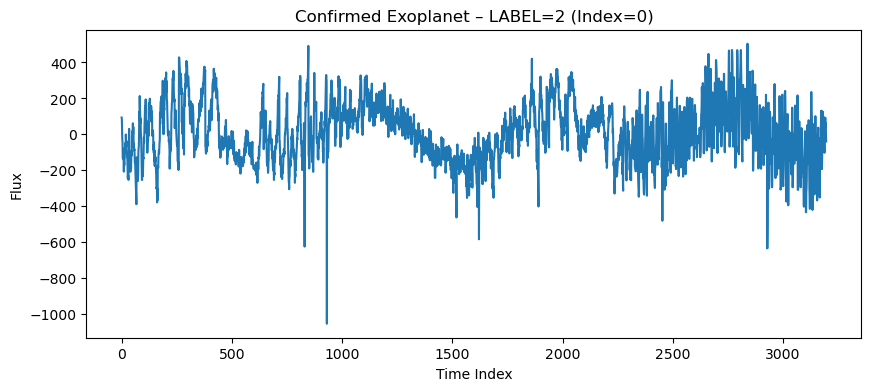

In [6]:
import matplotlib.pyplot as plt

# Get index of first planet example
planet_idx = df[df['LABEL'] == 2].index[0]
row = df.iloc[planet_idx]

# Extract flux values (skip LABEL column)
flux_planet = row.values[1:]  

plt.figure(figsize=(10, 4))
plt.plot(flux_planet)
plt.title(f"Confirmed Exoplanet – LABEL=2 (Index={planet_idx})")
plt.xlabel("Time Index")
plt.ylabel("Flux")
plt.show()


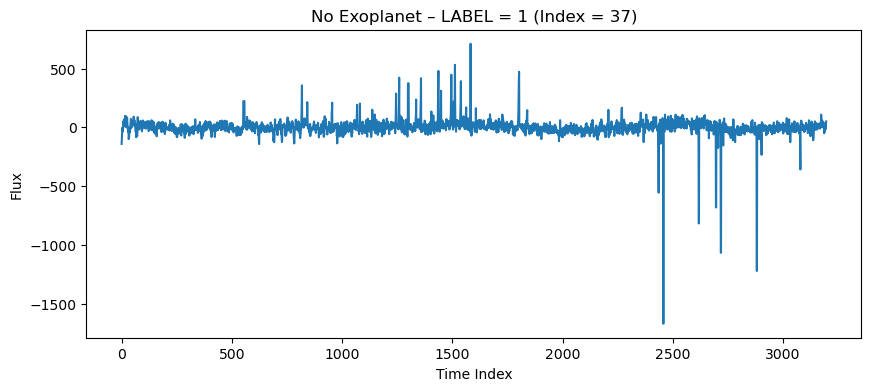

In [7]:
# Find an example of LABEL=1 (no exoplanet)
non_planet_idx = df[df['LABEL'] == 1].index[0]
row2 = df.iloc[non_planet_idx]
flux_no_planet = row2.values[1:]

plt.figure(figsize=(10,4))
plt.plot(flux_no_planet)
plt.title(f"No Exoplanet – LABEL = 1 (Index = {non_planet_idx})")
plt.xlabel("Time Index")
plt.ylabel("Flux")
plt.show()


In [8]:
df_planet = df[df['LABEL'] == 2]                # 37 samples
df_no_planet = df[df['LABEL'] == 1].sample(len(df_planet), random_state=42)

df_balanced = pd.concat([df_planet, df_no_planet]).sample(frac=1, random_state=42)
df_balanced['LABEL'].value_counts()


LABEL
2    37
1    37
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X = df_balanced.drop("LABEL", axis=1)
y = df_balanced["LABEL"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train ML model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      0.44      0.62         9
           2       0.55      1.00      0.71         6

    accuracy                           0.67        15
   macro avg       0.77      0.72      0.66        15
weighted avg       0.82      0.67      0.65        15

[[4 5]
 [0 6]]


In [10]:
import numpy as np

def smooth_flux(row, window_size=5):
    flux = row.values[1:]  # skip LABEL
    smoothed = np.convolve(flux, np.ones(window_size)/window_size, mode='same')
    return np.insert(smoothed, 0, row['LABEL'])  # keep LABEL at index 0


In [11]:
df_smooth = df_balanced.apply(lambda row: smooth_flux(row), axis=1, result_type='expand')
df_smooth.head()


,0,1,2,3,4,5,6,7,8,9,...,3188,3189,3190,3191,3192,3193,3194,3195,3196,3197
4,2.0,-667.750,-886.770,-1098.280,-1083.734,-1060.884,-1041.636,-1020.530,-1003.196,-982.960,...,-484.868,-455.376,-439.738,-408.572,-408.182,-404.780,-415.690,-429.046,-341.338,-261.396
522,1.0,-5.300,-8.572,-11.026,-13.806,-13.300,-14.120,-12.058,-10.818,-7.668,...,5.490,6.562,8.206,13.530,11.872,14.758,12.658,10.314,4.680,3.262
18,2.0,-25.312,-35.118,-49.150,-52.962,-60.274,-66.038,-68.170,-62.494,-46.344,...,-5.368,5.974,9.792,4.480,-3.576,-7.432,-23.762,-15.392,-8.842,-2.786
0,2.0,39.552,34.156,26.244,-17.468,-61.266,-84.540,-95.122,-119.244,-135.796,...,-64.854,-54.750,-41.734,-7.612,20.682,53.396,49.386,31.764,13.256,5.392
28,2.0,-31.728,-38.638,-47.506,-37.966,-31.350,-21.088,-15.588,-5.090,-0.798,...,-110.894,-113.848,-114.900,-110.230,-102.386,-87.486,-72.486,-62.454,-44.378,-29.506


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Separate X and y
X = df_smooth.drop(columns=[0])      # column 0 = LABEL
y = df_smooth[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       1.00      0.56      0.71         9
         2.0       0.60      1.00      0.75         6

    accuracy                           0.73        15
   macro avg       0.80      0.78      0.73        15
weighted avg       0.84      0.73      0.73        15

[[5 4]
 [0 6]]


In [16]:
from scipy.signal import savgol_filter
import numpy as np

def sg_smooth(row, window=25, poly=2):
    flux = row.values[1:]
    smoothed = savgol_filter(flux, window_length=window, polyorder=poly)
    return np.insert(smoothed, 0, row['LABEL'])


In [17]:
df_smooth2 = df_balanced.apply(lambda row: sg_smooth(row), axis=1, result_type='expand')


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Separate X and y
X = df_smooth2.drop(columns=[0])      # column 0 = LABEL
y = df_smooth2[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       1.00      0.44      0.62         9
         2.0       0.55      1.00      0.71         6

    accuracy                           0.67        15
   macro avg       0.77      0.72      0.66        15
weighted avg       0.82      0.67      0.65        15

[[4 5]
 [0 6]]


IndexError: index 1524 is out of bounds for axis 0 with size 15

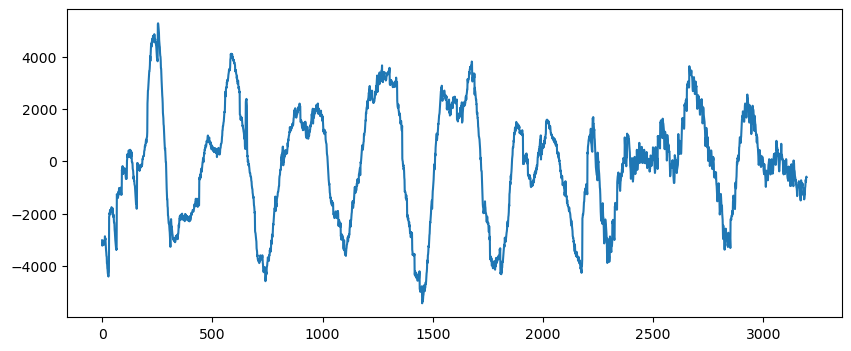

In [19]:
import matplotlib.pyplot as plt
import numpy as np

wrong_indices = X_test.index[y_test != y_pred]

for i in wrong_indices:
    row = df.iloc[i]
    flux = row.values[1:]
    plt.figure(figsize=(10,4))
    plt.plot(flux)
    plt.title(f"Misclassified Example – True = {y_test[i]}, Pred = {y_pred[i]}")
    plt.xlabel("Time Index")
    plt.ylabel("Flux")
    plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

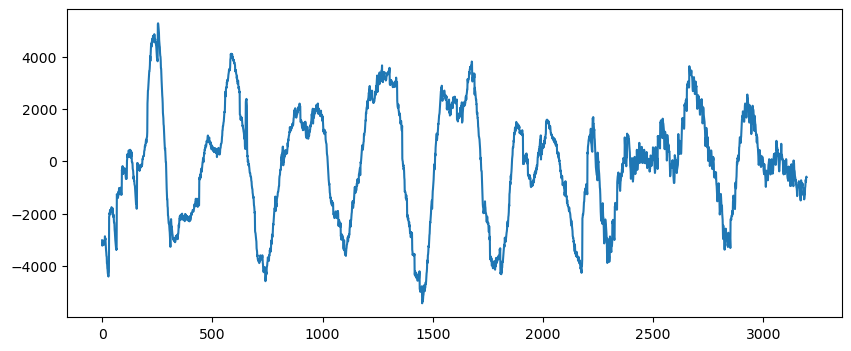

In [20]:
wrong_indices = X_test.index[y_test != y_pred]  # original indexes

for i in wrong_indices:
    row = df.iloc[i]             # Use original dataset index
    flux = row.values[1:]        # Drop label
    plt.figure(figsize=(10,4))
    plt.plot(flux)
    plt.title(f"Misclassified Example – True = {y_test.loc[i]}, Pred = {y_pred.loc[i]}")
    plt.xlabel("Time Index")
    plt.ylabel("Flux")
    plt.show()


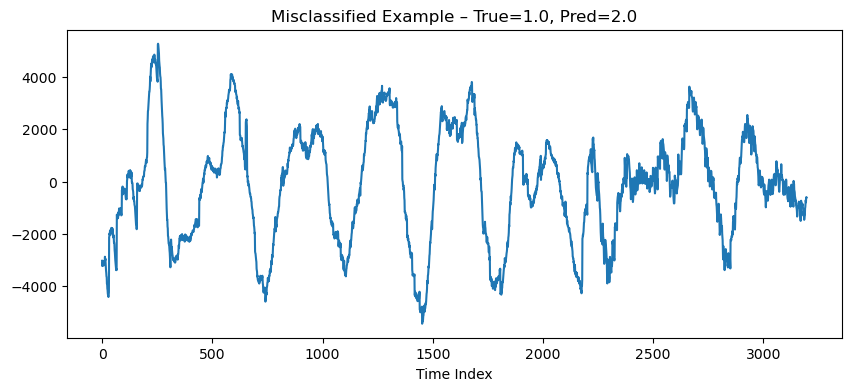

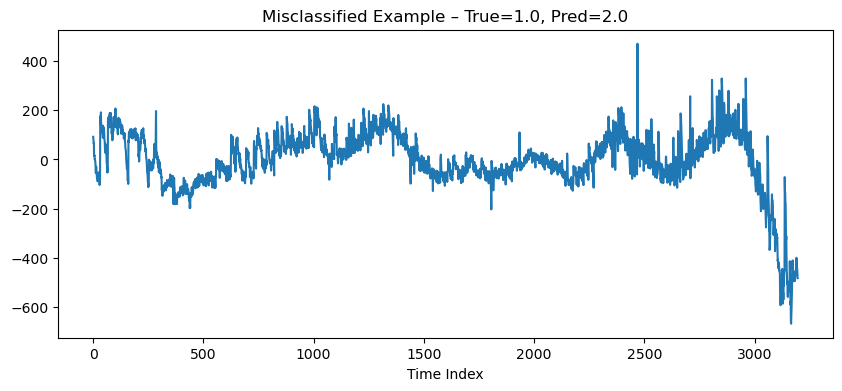

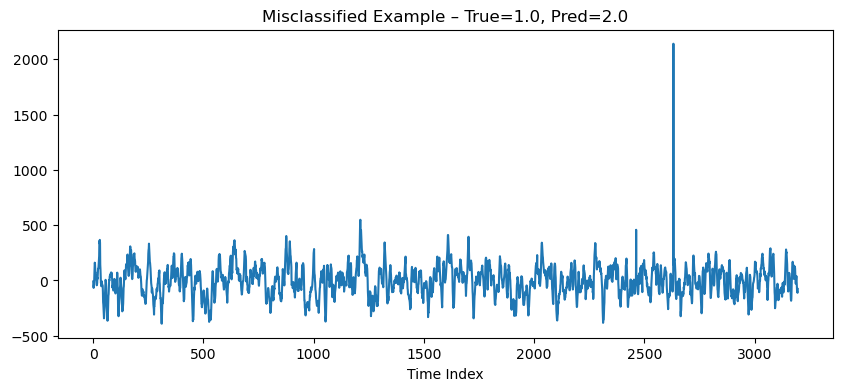

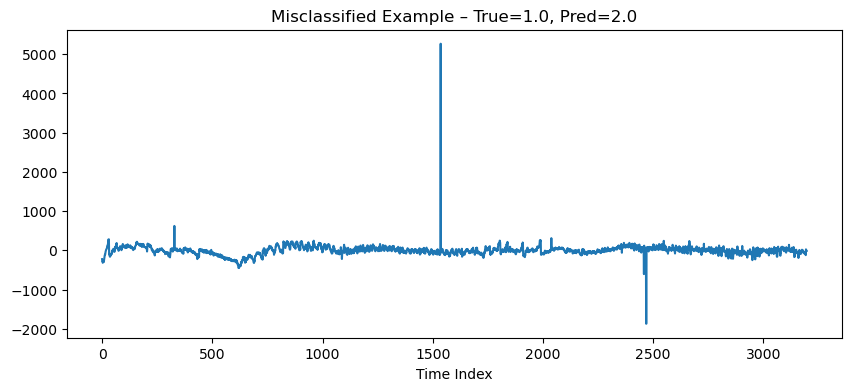

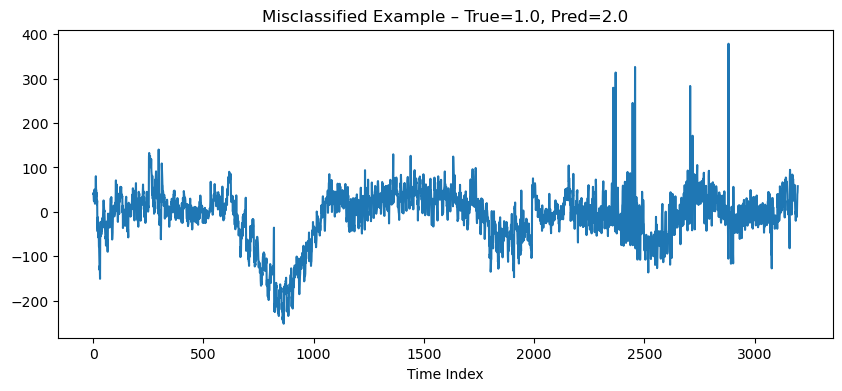

In [21]:
wrong_indices = X_test.index[y_test != y_pred]  # original indices

for i in wrong_indices:
    row = df.iloc[i]
    flux = row.values[1:]  # exclude label column

    plt.figure(figsize=(10,4))
    plt.plot(flux)
    plt.title(f"Misclassified Example – True={y_test.loc[i]}, Pred={y_pred[list(X_test.index).index(i)]}")
    plt.xlabel("Time Index")
    plt


In [22]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/af/7f/c8bde020171c900fcc808a16fe643c16d5ef96fd1516a24478bc54a428b0/xgboost-3.1.1-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.2 MB/s eta 0:00:000:00:01m eta 0:00:010m


In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Train-test split (use smoothed data)
X = df_smooth2.drop(columns=[0])
y = df_smooth2[0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost Model
model_xgb = XGBClassifier(
    eval_metric='logloss',          # required to avoid warning
    use_label_encoder=False,
    n_estimators=200,               # number of trees
    max_depth=5,                    # controls complexity
    learning_rate=0.05,             # smaller = safer learning
    subsample=0.8,                  # prevents overfitting
    colsample_bytree=0.8
)

model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [1. 2.]

In [24]:
# Convert labels: 1 -> 0 (no planet), 2 -> 1 (planet)
df_smooth2[0] = df_smooth2[0].replace({1: 0, 2: 1})

df_smooth2[0].value_counts()


0
1.0    37
0.0    37
Name: count, dtype: int64

In [25]:
from xgboost import XGBClassifier

# Train-test split
X = df_smooth2.drop(columns=[0])
y = df_smooth2[0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_xgb = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8
)

model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


/Users/parthabarman/anaconda3/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [01:21:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

         0.0       1.00      0.44      0.62         9
         1.0       0.55      1.00      0.71         6

    accuracy                           0.67        15
   macro avg       0.77      0.72      0.66        15
weighted avg       0.82      0.67      0.65        15

[[4 5]
 [0 6]]


In [27]:
df_test = pd.read_csv("exoplanet_ml_project/exotest.csv")


In [28]:
df_test_smooth = df_test.apply(lambda row: smooth_flux(row), axis=1, result_type='expand')


In [29]:
df_test_smooth[0] = df_test_smooth[0].replace({1: 0, 2: 1})


In [30]:
X_real = df_test_smooth.drop(columns=[0])
y_real = df_test_smooth[0]

y_real_pred = model.predict(X_real)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_real, y_real_pred))
print(confusion_matrix(y_real, y_real_pred))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       565
         1.0       0.00      0.20      0.01         5
         2.0       0.00      0.00      0.00         0

    accuracy                           0.00       570
   macro avg       0.00      0.07      0.00       570
weighted avg       0.00      0.00      0.00       570

[[  0 327 238]
 [  0   1   4]
 [  0   0   0]]


/Users/parthabarman/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/parthabarman/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/parthabarman/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", resul

In [31]:
from imblearn.over_sampling import SMOTE

X = df.drop("LABEL", axis=1)
y = df["LABEL"].replace({1: 0, 2: 1})  # convert labels

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

pd.Series(y_resampled).value_counts()


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/parthabarman/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)